27.434306130193725
            OMRÅDE CIVILSTAND     TID  INDHOLD
10       København      Ugift  2020K3   414218
420         Aarhus      Ugift  2020K3   208470
520        Aalborg      Ugift  2020K3   118694
290         Odense      Ugift  2020K3   112672
15   Frederiksberg      Ugift  2020K3    60802


(0.0, 100.0)

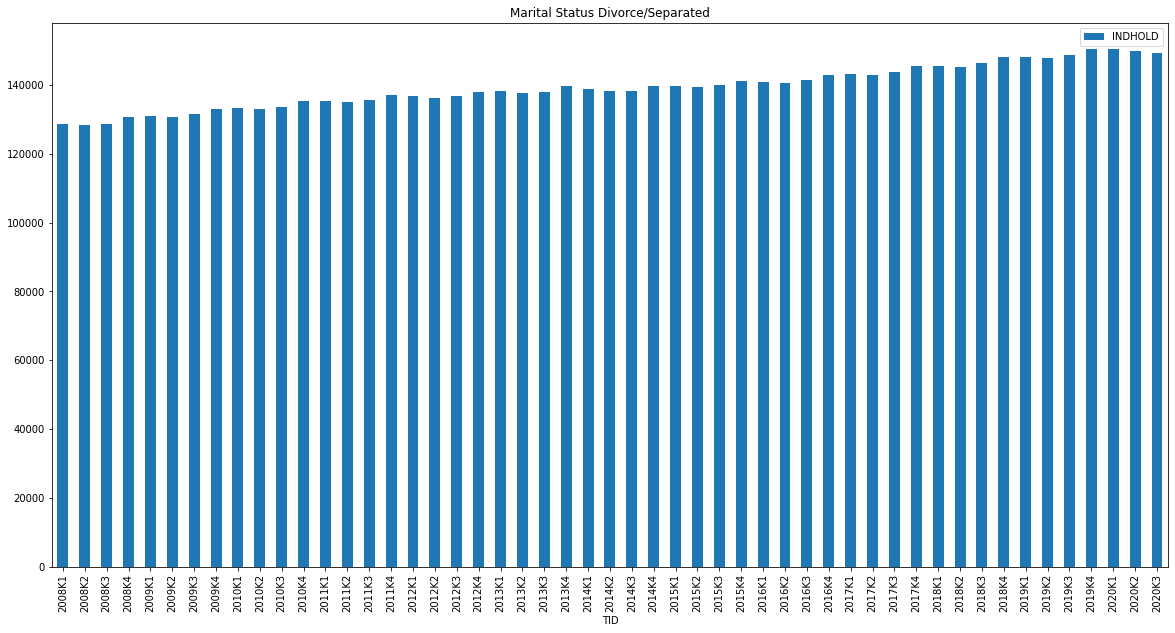

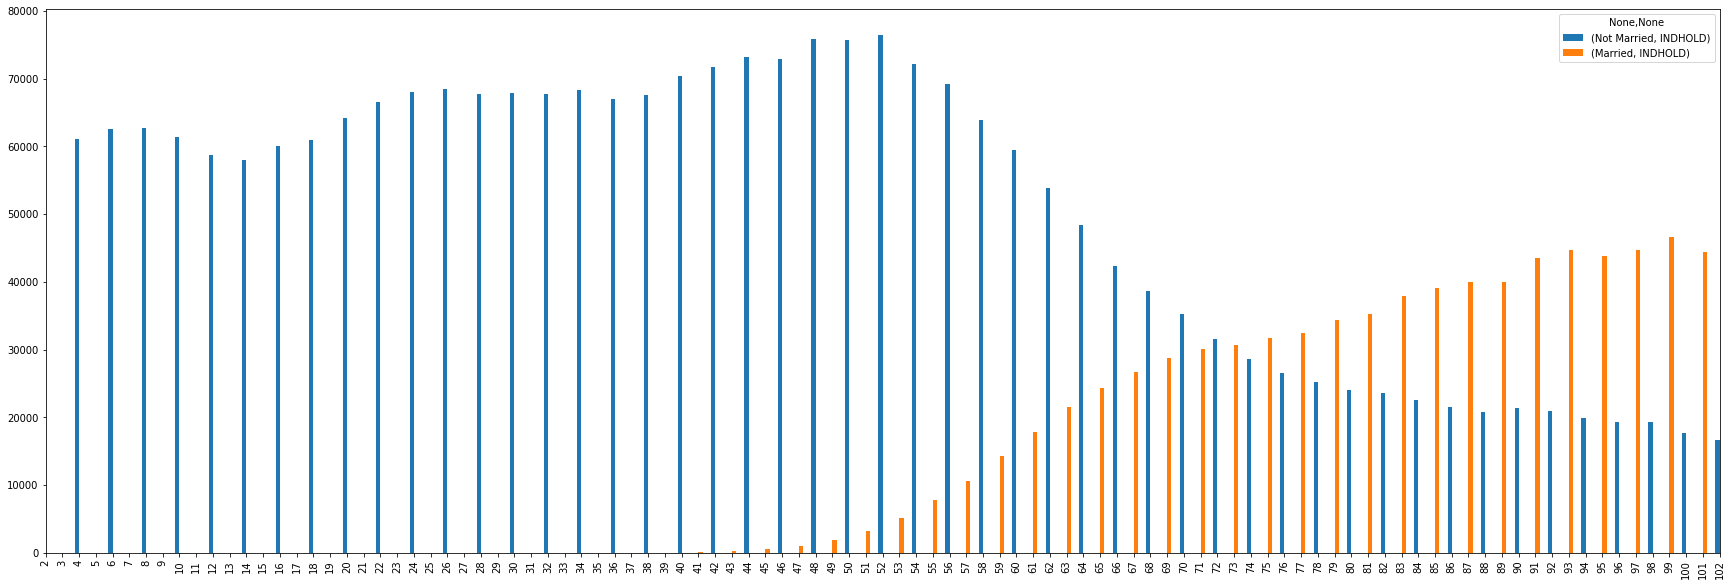

In [28]:
import pandas as pd 
pd.options.mode.chained_assignment = None  # default='warn'
divorced_df = pd.read_csv('divorced.csv', sep=';')

#What is the change in pct of divorced danes from 2008 to 2020?

divorced2008 = divorced_df.iloc[0,2]
divorced2020 = divorced_df.iloc[1,2]

divorceChangeInPercent = (divorced2020-divorced2008) / divorced2008 * 100

print(divorceChangeInPercent)

#Which of the 5 biggest cities has the highest percentage of 'Never Married' in 2020?

never_married_df = pd.read_csv('nevermarried.csv', sep=';')


                             

neverMarriedTop5 = never_married_df[(never_married_df['OMRÅDE'] != 'Hele landet') 
                             & (never_married_df['OMRÅDE'] != 'Region Hovedstaden') 
                             &(never_married_df['OMRÅDE'] != 'Region Midtjylland') 
                             & (never_married_df['OMRÅDE'] != 'Region Syddanmark') 
                             & (never_married_df['OMRÅDE'] != 'Region Sjælland') 
                             & (never_married_df['OMRÅDE'] != 'Region Nordjylland')
                             & (never_married_df['CIVILSTAND'] == 'Ugift')
                            ]
                             
neverMarriedTop5.sort_values('INDHOLD', ascending=False, inplace=True )

print(neverMarriedTop5[:5])


#Show a bar chart of changes in marrital status in Copenhagen from 2008 till now

import matplotlib.pyplot as plt
%matplotlib inline 
marital_status_df = pd.read_csv('maritalstatus.csv', sep=';')

marital_status_df.plot(kind="bar", title='Marital Status Divorce/Separated', figsize=(20,10), x='TID', y='INDHOLD')

#Show 2 plots in same figure: 'Married' and 'Never Married' for all ages in DK in 2020 (Hint: x axis is age from 0-125, y axis is how many people in the 2 categories). Add lengend to show names on graphs

allData = pd.read_csv('married_nevermarried.csv', sep=';')

data = allData[(allData['ALDER'] != 'I alt')]

unmarried = data[(data['CIVILSTAND'] == 'Ugift')]
married = data[(data['CIVILSTAND'] == 'Gift/separeret')]

ts = pd.concat([unmarried, married] , axis=1, keys=['Not Married', 'Married'])
ts.plot(kind="bar", figsize=(30,10))
plt.xlim(0,100)
